In [508]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [454]:
from numpy.random import rand, randn


In [527]:
n, d, k = 1000, 2, 4



In [528]:
np.random.seed(20)
X = rand(n, d)

means = [rand(d)  for _ in range(k)]  # works for any k
#means = [rand(d) * 0.5 + 0.5, - rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))
sigmas = [S] * k    # we'll use the same Sigma for all clusters for better visual results

#print(means)
print(sigmas)


[array([[0.41254119, 0.        ],
       [0.        , 0.35117044]]), array([[0.41254119, 0.        ],
       [0.        , 0.35117044]]), array([[0.41254119, 0.        ],
       [0.        , 0.35117044]]), array([[0.41254119, 0.        ],
       [0.        , 0.35117044]])]


Solution
===

In [458]:
def compute_log_p(x, mean, sigma):
    mat1 = (X - mean).T
    mat2 = np.linalg.inv(sigma)
    mat4 = np.dot(mat2, mat1)
    mat3 = mat1.T
    mat = np.diag(np.dot(mat3, mat4))
    numerator = np.exp(-mat/2)
    denominator = ((2*np.pi)**(d/2)*np.linalg.det(sigma))
    p = numerator/denominator
    return p


'\nlog_ps = []\nfor x in X:\n    p = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping\n    log_ps.append(p)\n\nprint(np.array(log_ps).shape)\n'

In [529]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping


'\nlog_ps = []\nfor x in X:\n    p = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping\n    log_ps.append(p)\n\nprint(np.array(log_ps).shape)\n'

In [530]:
assignments = np.argmax(log_ps, axis=0)
print(len(assignments))

1000


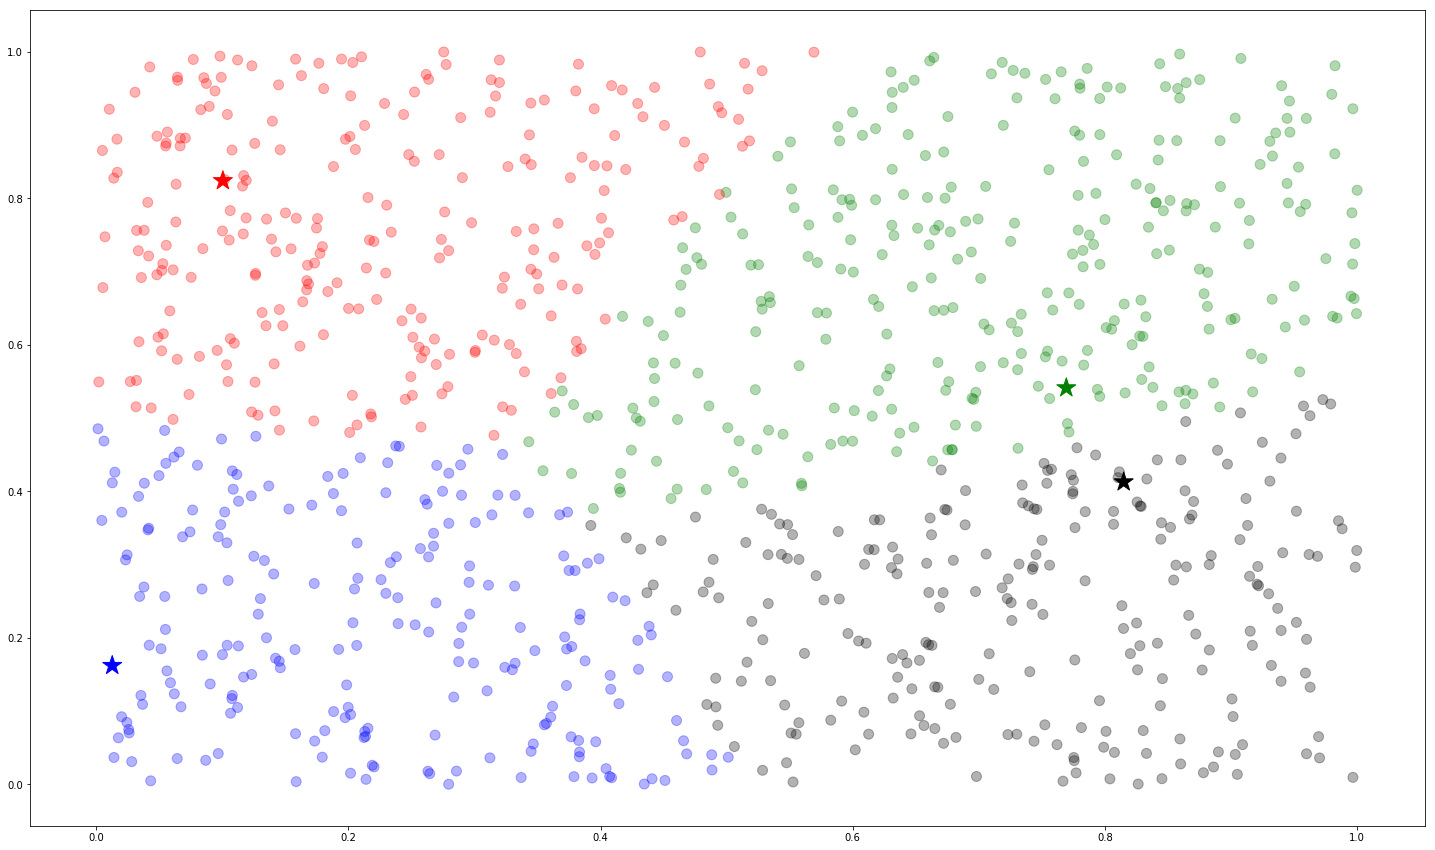

In [531]:
list_of_colors = ['red', 'green',
                  'blue',
                   'black',
   #               'c'
                  ]

fig = plt.figure(figsize=[25, 15])
ax = fig.add_subplot(111)


colors = np.array(list_of_colors)[assignments]
ax.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.3)
ax.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=400, c=list_of_colors)

plt.show()